# DATA ANALYSIS
## Diabetes Dataset Analysis

Analiza danych z źródła: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset dotycząca danych diabetycznych.

Zadania do wykonania:
1. Pobrać dane z źródła.
2. Przeanalizować zależność między współczynnkiem BMI oraz cukrzycą. Do tego celu sprawdzić co dany współczynnik BMI oznacza i dodać to w odpowiedniej kolumnie.
3. Przeanalizować zależność wieku i cukrzycy.
4. Przeanalizować zależność wieku i BMI oraz wpływu obu tych elementów na cukrzycę.
5. Przeanalizować ilość ciąż na cukrzycę.

In [1]:
# import package to analysis
import numpy as np
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode - to show plotly in Notebook's output
init_notebook_mode(connected = True)
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly import subplots
import plotly.figure_factory as ff

## 1. Pobrać dane z źródła.

In [2]:
# import diabetes dataset
diabetes_dataset = pd.read_csv('diabetes.csv', sep = ',')
print("First row in diabetes dataset")
display(diabetes_dataset.head())
print("Description of diabetes dataset")
display(diabetes_dataset.describe())
print("Info of diabetes dataset")
display(diabetes_dataset.info())

First row in diabetes dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Description of diabetes dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Info of diabetes dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

## 2. Przeanalizować zależność między współczynnkiem BMI oraz cukrzycą. Do tego celu sprawdzić co dany współczynnik BMI oznacza i dodać to w odpowiedniej kolumnie.

In [3]:
# BMI calculation

"""Zakres indeksu BMI został ujednolicony dla obu płci i interpretuje się go w następujący sposób:

Wskaźnik BMI [kg/m2]	Interpretacja
<16,0	ciężkie niedożywienie
16,0-16,9	niedożywienie średniego stopnia
17,0-18,4	łagodne niedożywienie
18,5-24,9	prawidłowa masa ciała
25,0-29,9	nadwaga
30,0-34,9	otyłość I stopnia
35,0-39,9	otyłość II stopnia
⩾ 40,0	otyłość III stopnia"""

def calculate_bmi(row):
    if row['BMI'] < 16.0:
        row['BMI_description'] = 'severe malnutrition'
    elif row['BMI'] < 17.0:
        row['BMI_description'] = 'moderate malnutrition'
    elif row['BMI'] < 18.5:
        row['BMI_description'] = 'mild malnutrition'
    elif row['BMI'] < 25.0:
        row['BMI_description'] = 'correct body weight'
    elif row['BMI'] < 30.0:
        row['BMI_description'] = 'overweight'
    elif row['BMI'] < 35.0:
        row['BMI_description'] = 'I degree obesity'
    elif row['BMI'] < 40.0:
        row['BMI_description'] = 'II degree obesity'
    else:
        row['BMI_description'] = 'III degree obesity'
    return row

In [4]:
# add bmi description column
diabetes_dataset = diabetes_dataset.apply(lambda row: calculate_bmi(row), axis = 1)
print("Add column to describe BMI")
display(diabetes_dataset.head())

Add column to describe BMI


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_description
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,I degree obesity
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,overweight
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,correct body weight
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,overweight
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,III degree obesity


In [5]:
# analysis diabetes by BMI description
diabetes_by_BMI = diabetes_dataset.pivot_table(index = {'BMI_description', 'Outcome'}, aggfunc = 'count')['BMI'].to_frame()
diabetes_by_BMI.rename(columns = {'BMI' : 'number_of_people'}, inplace = True)
diabetes_by_BMI.reset_index(inplace = True)
diabetes_by_BMI

,BMI_description,Outcome,number_of_people
0,I degree obesity,0.0,123
1,I degree obesity,1.0,101
2,II degree obesity,0.0,87
3,II degree obesity,1.0,63
4,III degree obesity,0.0,43
5,III degree obesity,1.0,55
6,correct body weight,0.0,95
7,correct body weight,1.0,7
8,mild malnutrition,0.0,4
9,overweight,0.0,139


In [6]:
not_diabetes_by_BMI = diabetes_by_BMI[diabetes_by_BMI['Outcome'] == 0.0]
is_diabetes_by_BMI = diabetes_by_BMI[diabetes_by_BMI['Outcome'] == 1.0]
display(not_diabetes_by_BMI)
display(is_diabetes_by_BMI)

,BMI_description,Outcome,number_of_people
0,I degree obesity,0.0,123
2,II degree obesity,0.0,87
4,III degree obesity,0.0,43
6,correct body weight,0.0,95
8,mild malnutrition,0.0,4
9,overweight,0.0,139
11,severe malnutrition,0.0,9


,BMI_description,Outcome,number_of_people
1,I degree obesity,1.0,101
3,II degree obesity,1.0,63
5,III degree obesity,1.0,55
7,correct body weight,1.0,7
10,overweight,1.0,40
12,severe malnutrition,1.0,2


In [7]:
by_BMI = not_diabetes_by_BMI.merge(is_diabetes_by_BMI, how = 'outer', on = 'BMI_description')#left_on='BMI_description', right_on='BMI_description')
by_BMI.rename(columns = {'number_of_people_x' : 'not_diabetes', 'number_of_people_y' : 'is_diabetes'}, inplace = True)
by_BMI.drop(columns = {'Outcome_x', 'Outcome_y'}, inplace = True)
by_BMI['is_diabetes'].fillna(value = 0.0, inplace = True)
display(by_BMI)

,BMI_description,not_diabetes,is_diabetes
0,I degree obesity,123,101.0
1,II degree obesity,87,63.0
2,III degree obesity,43,55.0
3,correct body weight,95,7.0
4,mild malnutrition,4,0.0
5,overweight,139,40.0
6,severe malnutrition,9,2.0


In [8]:
# prepared figures
domain = by_BMI['BMI_description']
fig = go.Figure()
fig.add_trace(go.Bar(x = domain, y = by_BMI['not_diabetes'], name = 'osoby zdrowę'))
fig.add_trace(go.Bar(x = domain, y = by_BMI['is_diabetes'], name = 'osoby chorę na cukrzyce'))
fig.update_layout(title = 'Zależność zachorowania na cukrzyce od współczynnika BMI')
iplot(fig)

Na podstawie zebranych danych można wysunąć niewiele wniosków, poza podstawowym, że otyłość wpływa na zachorowanie cukrzycę. Jednak dopiero w przypadku III stopnia otyłości można zauważyć, że ilość osób chorych na cukrzycę jest większa niż osób zdrowych. Nie pokazuje to jednak jak wygląda to w zestawieniu ile osób w danej grupie procentowo choruje na cukrzycę. Do dalszej analizy przeanalizowano ile procentowo w każdej grupie osób choruje na cukrzycę.

In [9]:
# poszerzenie analizy w stosunku do ilości badanych osób
def percentage_of_diabetes(row):
    row['percent_of_diabetes'] = row['is_diabetes'] / (row['is_diabetes'] + row['not_diabetes'])
    return row

by_BMI = by_BMI.apply(lambda x: percentage_of_diabetes(x), axis = 1)
by_BMI

,BMI_description,not_diabetes,is_diabetes,percent_of_diabetes
0,I degree obesity,123,101.0,0.450893
1,II degree obesity,87,63.0,0.420000
2,III degree obesity,43,55.0,0.561224
3,correct body weight,95,7.0,0.068627
4,mild malnutrition,4,0.0,0.000000
5,overweight,139,40.0,0.223464
6,severe malnutrition,9,2.0,0.181818


In [10]:
# data for all pacients
all_pacients = (by_BMI['is_diabetes'].sum() + by_BMI['not_diabetes'].sum())
only_diabetes = by_BMI['is_diabetes'].sum()
percent_of_diabetes = (only_diabetes * 100) / all_pacients
print(f"Zbadano łącznie {all_pacients:.0f} osób, z czego {only_diabetes:.0f} choruje na cukrzycę. Stanowi to {percent_of_diabetes:.2f}% wszystkich badanych.")
# plot
domain = by_BMI['BMI_description']
fig = go.Figure()
fig.add_trace(go.Bar(x = domain, y = by_BMI['percent_of_diabetes']))
fig.update_layout(title = 'Procent osób cierpiących na cukrzycę w każdej grupie BMI')
iplot(fig)

Zbadano łącznie 768 osób, z czego 268 choruje na cukrzycę. Stanowi to 34.90% wszystkich badanych.


## Analiza zależności BMI i cukrzycy.
Dokładniejsza analiza pokazała zależność otyłości i cukrzycy. Osoby otyłe z cukrzycą stanowiły zawsze ponad 40% osób, którę miały otyłość. Ogólnie wśród badanych osób niecałe 35% stanowili cukrzycy, więc można wysunąć wniosek, że otyłość może prowadzić do otyłości, albo jest z nią związana. Nieco lepiej wygląda sytuacja gdy mamy nadwagę, tutaj otyłość stanowi niewiele ponad 22%. Najmniejszy odsetek diabetyków można zauważyć w grupie osób z prawidłową masą ciała jak i łagodnym niedożywieniem (niedowagą), natomiast w grupie niedożywienia średniego stopnia następował ponowny wzrost diabetyków w stosunku do osób zdrowych. Niestety te wnioski mogą nie być prawidłowe, ponieważ wśród osób z niedowagą oraz z niedożywieniem średniego stopnia było bardzo mało osób (odpowiednio 4 i 11), więc każde odchylenie w tak mało liczebnej grupie znacząco zmienia wynik. Przykładowo gdyby znaleźć jedną osobę z niegowagą, która miała by cukrzycę, dało by to 5 osób badanych w danej grupie z czego aż 20% stanowiły by osoby chorę na cukrzycę. Dlatego analiza niedowagi, niedożywienia i zależności z byciem cukrzykiem powinna być zbadana na szerszej grupie badawczej.

## 3. Przeanalizować zależność wieku i cukrzycy.

In [11]:
diabetes_by_age = diabetes_dataset.pivot_table(index = {'Age', 'Outcome'}, aggfunc = 'count')['BMI'].to_frame()
diabetes_by_age.rename(columns = {'BMI' : 'Number_of_People'}, inplace = True)
diabetes_by_age.reset_index(inplace = True)
diabetes_by_age.head()

,Age,Outcome,Number_of_People
0,21.0,0.0,58
1,21.0,1.0,5
2,22.0,0.0,61
3,22.0,1.0,11
4,23.0,0.0,31


In [12]:
# funcion to divide of age into ranges
def dividion_of_age_into_ranges(row):
    if row['Age'] <= 20:
        row['Age_range'] = '20 or less'
    elif row['Age'] <= 25:
        row['Age_range'] = 'between 21 to 25'
    elif row['Age'] <= 30:
        row['Age_range'] = 'between 26 to 30'
    elif row['Age'] <= 35:
        row['Age_range'] = 'between 31 to 35'
    elif row['Age'] <= 40:
        row['Age_range'] = 'between 36 to 40'
    elif row['Age'] <= 50:
        row['Age_range'] = 'between 41 to 50'
    elif row['Age'] < 60:
        row['Age_range'] = 'between 51 to 60'
    elif row['Age'] <= 80:
        row['Age_range'] = 'between 61 to 80'
    else:
        row['Age_range'] = 'more then 80'
    return row

diabetes_by_age = diabetes_by_age.apply(lambda x: dividion_of_age_into_ranges(x), axis = 1)
diabetes_by_age

,Age,Outcome,Number_of_People,Age_range
0,21.0,0.0,58.0,between 21 to 25
1,21.0,1.0,5.0,between 21 to 25
2,22.0,0.0,61.0,between 21 to 25
3,22.0,1.0,11.0,between 21 to 25
4,23.0,0.0,31.0,between 21 to 25
...,...,...,...,...
91,68.0,0.0,1.0,between 61 to 80
92,69.0,0.0,2.0,between 61 to 80
93,70.0,1.0,1.0,between 61 to 80
94,72.0,0.0,1.0,between 61 to 80


In [13]:
diabetes_by_age = diabetes_by_age.pivot_table(index = {'Age_range', 'Outcome'}, aggfunc = 'sum')['Number_of_People'].to_frame()
diabetes_by_age.reset_index(inplace = True)
diabetes_by_age

,Age_range,Outcome,Number_of_People
0,between 21 to 25,0.0,222.0
1,between 21 to 25,1.0,45.0
2,between 26 to 30,0.0,105.0
3,between 26 to 30,1.0,45.0
4,between 31 to 35,0.0,40.0
5,between 31 to 35,1.0,41.0
6,between 36 to 40,0.0,41.0
7,between 36 to 40,1.0,35.0
8,between 41 to 50,0.0,49.0
9,between 41 to 50,1.0,64.0


In [14]:
not_diabetes_by_age = diabetes_by_age[diabetes_by_age['Outcome'] == 0.0]
is_diabetes_by_age = diabetes_by_age[diabetes_by_age['Outcome'] == 1.0]
display(not_diabetes_by_age)
display(is_diabetes_by_age)

,Age_range,Outcome,Number_of_People
0,between 21 to 25,0.0,222.0
2,between 26 to 30,0.0,105.0
4,between 31 to 35,0.0,40.0
6,between 36 to 40,0.0,41.0
8,between 41 to 50,0.0,49.0
10,between 51 to 60,0.0,20.0
12,between 61 to 80,0.0,22.0
14,more then 80,0.0,1.0


,Age_range,Outcome,Number_of_People
1,between 21 to 25,1.0,45.0
3,between 26 to 30,1.0,45.0
5,between 31 to 35,1.0,41.0
7,between 36 to 40,1.0,35.0
9,between 41 to 50,1.0,64.0
11,between 51 to 60,1.0,29.0
13,between 61 to 80,1.0,9.0


In [15]:
by_age = not_diabetes_by_age.merge(is_diabetes_by_age, how = 'outer', on = 'Age_range')
by_age.rename(columns = {'Number_of_People_x' : 'not_diabetes', 'Number_of_People_y' : 'is_diabetes'}, inplace = True)
by_age.drop(columns = {'Outcome_x', 'Outcome_y'}, inplace = True)
by_age['is_diabetes'].fillna(value = 0.0, inplace = True)
display(by_age)

,Age_range,not_diabetes,is_diabetes
0,between 21 to 25,222.0,45.0
1,between 26 to 30,105.0,45.0
2,between 31 to 35,40.0,41.0
3,between 36 to 40,41.0,35.0
4,between 41 to 50,49.0,64.0
5,between 51 to 60,20.0,29.0
6,between 61 to 80,22.0,9.0
7,more then 80,1.0,0.0


In [16]:
# poszerzenie analizy w stosunku do ilości badanych osób
by_age = by_age.apply(lambda x: percentage_of_diabetes(x), axis = 1)
by_age

,Age_range,not_diabetes,is_diabetes,percent_of_diabetes
0,between 21 to 25,222.0,45.0,0.168539
1,between 26 to 30,105.0,45.0,0.300000
2,between 31 to 35,40.0,41.0,0.506173
3,between 36 to 40,41.0,35.0,0.460526
4,between 41 to 50,49.0,64.0,0.566372
5,between 51 to 60,20.0,29.0,0.591837
6,between 61 to 80,22.0,9.0,0.290323
7,more then 80,1.0,0.0,0.000000


In [17]:
# data for all pacients
all_pacients = (by_age['is_diabetes'].sum() + by_BMI['not_diabetes'].sum())
only_diabetes = by_age['is_diabetes'].sum()
percent_of_diabetes = (only_diabetes * 100) / all_pacients
print(f"Zbadano łącznie {all_pacients:.0f} osób, z czego {only_diabetes:.0f} choruje na cukrzycę. Stanowi to {percent_of_diabetes:.2f}% wszystkich badanych.")
# plot
domain = by_age['Age_range']
fig = go.Figure()
fig.add_trace(go.Bar(x = domain, y = by_age['percent_of_diabetes']))
fig.update_layout(title = 'Procent osób cierpiących na cukrzycę w zadanych zakresach wiekowych')
iplot(fig)

Zbadano łącznie 768 osób, z czego 268 choruje na cukrzycę. Stanowi to 34.90% wszystkich badanych.


## Analiza ze względu na wiek
Można zauważyć początkową tendencję wzrostową, że wraz z wiekiem ilość osób, które zachorowało na cukrzycę jest większa. Może to być związane z tym, że czas na zaniedbywanie swojego zdrowia był dłuższy, a częste zaniedbania w wieku młodzieńczym wychodzą w późniejszym czasie. Im młodsza osoba, tym jej organizm lepiej radzi sobie z regeneracją i leczeniem. Ciekawym jest spadek wśród osób powyżej 60 roku życia. Tutaj zdecydowanie mniej osób choruję na cukrzycę. Należało by szerzej spojrzeć na przyczyny takiego zjawiska. Może to właśnie wynikać, że osoby 60+ to osoby, które dzieciństwo spędziły głównie w czasie powojennym, gdzie dostęp do niezdrowej żywności był znacząco ograniczony i z wiedzy ogólnej można wysunąć wniosek, że otyłość wśród dzieci i młodzieży była rzadsza. Niemniej trzeba by było przeprowadzić dodatkową analizę jak wystuacja zmieniała się na przestrzeni lat.

## 4. Przeanalizować zależność wieku i BMI oraz wpływu obu tych elementów na cukrzycę.


In [18]:
diabetes_by_BMI_age = diabetes_dataset[['BMI_description', 'Age', 'Outcome', 'Pregnancies', 'Glucose']]
diabetes_by_BMI_age_range = diabetes_by_BMI_age.apply(lambda x: dividion_of_age_into_ranges(x), axis = 1)
display(diabetes_by_BMI_age_range.head())
diabetes_by_BMI_age_range = diabetes_by_BMI_age_range.pivot_table(index = {'BMI_description', 'Age_range', 'Outcome'}, aggfunc = 'count')['Age'].to_frame()
diabetes_by_BMI_age_range.rename(columns = {'Age' : 'Number_of_People'}, inplace = True)
diabetes_by_BMI_age_range.reset_index(inplace = True)
print("Cukrzycy w zestawieniu dla zakresu BMI i wieku")
display(diabetes_by_BMI_age_range)

,BMI_description,Age,Outcome,Pregnancies,Glucose,Age_range
0,I degree obesity,50.0,1.0,6.0,148.0,between 41 to 50
1,overweight,31.0,0.0,1.0,85.0,between 31 to 35
2,correct body weight,32.0,1.0,8.0,183.0,between 31 to 35
3,overweight,21.0,0.0,1.0,89.0,between 21 to 25
4,III degree obesity,33.0,1.0,0.0,137.0,between 31 to 35


Cukrzycy w zestawieniu dla zakresu BMI i wieku


,BMI_description,Age_range,Outcome,Number_of_People
0,I degree obesity,between 21 to 25,0.0,55
1,I degree obesity,between 21 to 25,1.0,16
2,I degree obesity,between 26 to 30,0.0,20
3,I degree obesity,between 26 to 30,1.0,17
4,I degree obesity,between 31 to 35,0.0,10
...,...,...,...,...
69,severe malnutrition,between 21 to 25,0.0,7
70,severe malnutrition,between 26 to 30,0.0,1
71,severe malnutrition,between 26 to 30,1.0,1
72,severe malnutrition,between 51 to 60,1.0,1


In [19]:
not_diabetes_by_BMI_age = diabetes_by_BMI_age_range[diabetes_by_BMI_age_range['Outcome'] == 0.0]
is_diabetes_by_BMI_age = diabetes_by_BMI_age_range[diabetes_by_BMI_age_range['Outcome'] == 1.0]
display(not_diabetes_by_BMI_age.head())
display(is_diabetes_by_BMI_age.head())

,BMI_description,Age_range,Outcome,Number_of_People
0,I degree obesity,between 21 to 25,0.0,55
2,I degree obesity,between 26 to 30,0.0,20
4,I degree obesity,between 31 to 35,0.0,10
6,I degree obesity,between 36 to 40,0.0,11
8,I degree obesity,between 41 to 50,0.0,22


,BMI_description,Age_range,Outcome,Number_of_People
1,I degree obesity,between 21 to 25,1.0,16
3,I degree obesity,between 26 to 30,1.0,17
5,I degree obesity,between 31 to 35,1.0,16
7,I degree obesity,between 36 to 40,1.0,16
9,I degree obesity,between 41 to 50,1.0,22


In [20]:
by_BMI_age = pd.merge(not_diabetes_by_BMI_age, is_diabetes_by_BMI_age,  how = 'outer', left_on = ['Age_range', 'BMI_description'], right_on = ['Age_range', 'BMI_description'])
by_BMI_age.drop(columns = {'Outcome_x', 'Outcome_y'}, inplace = True)
by_BMI_age.rename(columns = {'Number_of_People_x' : 'not_diabetes', 'Number_of_People_y' : 'is_diabetes'}, inplace = True)
display(by_BMI_age)

,BMI_description,Age_range,not_diabetes,is_diabetes
0,I degree obesity,between 21 to 25,55.0,16.0
1,I degree obesity,between 26 to 30,20.0,17.0
2,I degree obesity,between 31 to 35,10.0,16.0
3,I degree obesity,between 36 to 40,11.0,16.0
4,I degree obesity,between 41 to 50,22.0,22.0
5,I degree obesity,between 51 to 60,1.0,9.0
6,I degree obesity,between 61 to 80,4.0,5.0
7,II degree obesity,between 21 to 25,27.0,11.0
8,II degree obesity,between 26 to 30,29.0,6.0
9,II degree obesity,between 31 to 35,6.0,8.0


In [21]:
by_BMI_age = by_BMI_age.apply(lambda x: percentage_of_diabetes(x), axis = 1)
by_BMI_age.fillna(0.0, inplace = True)
by_BMI_age

,BMI_description,Age_range,not_diabetes,is_diabetes,percent_of_diabetes
0,I degree obesity,between 21 to 25,55.0,16.0,0.225352
1,I degree obesity,between 26 to 30,20.0,17.0,0.459459
2,I degree obesity,between 31 to 35,10.0,16.0,0.615385
3,I degree obesity,between 36 to 40,11.0,16.0,0.592593
4,I degree obesity,between 41 to 50,22.0,22.0,0.500000
5,I degree obesity,between 51 to 60,1.0,9.0,0.900000
6,I degree obesity,between 61 to 80,4.0,5.0,0.555556
7,II degree obesity,between 21 to 25,27.0,11.0,0.289474
8,II degree obesity,between 26 to 30,29.0,6.0,0.171429
9,II degree obesity,between 31 to 35,6.0,8.0,0.571429


In [22]:
# prepared plot
domain = by_BMI_age['BMI_description']
fig = go.Figure()
fig.add_trace(go.Heatmap(x = domain,
                         y = by_BMI_age['Age_range'],
                         z = by_BMI_age['percent_of_diabetes']))
fig.update_layout(title = 'Zestawienie procentowe cukrzyków w zlaeżności od BMI i wieku')
iplot(fig)

## Analiza ze względu na wiek i BMI
Można zauważyć początkową tendencję wzrostową, że wraz z wiekiem ilość osób, które zachorowało na cukrzycę jest większa. Również podobna tendencja jest wraz ze wzrostem otyłości. Im młodszym się jest, tym mniej otyłość wpływa na cukrzycę, natomiast dalej ten wpływ jest zauważalny. Trudno odnieść się do wyników dla osób z niedowagą czy niedożywieniem oraz tych powyżej 80 roku życia ponieważ jest ich zwyczajnie za mało w badaniu. jednoznacznie można jednak określić, że większy wpływ na zachorowanie na cukrzyce ma jednak otyłość jak wiek, ponieważ osoby o poprawnej masie ciała bardzo rzadko chorują na cukrzycę i wartość ta jest słabo zależna od wieku jako takiego. Można wysunąć wniosek, że zaniedbania w młodszym wieku, szczególnie żywieniowe i za duża masa ciała, przekładają się na zwiększone pradopodobieństwo cukrzycy w późniejszym wieku. Moim zdaniem, nie tyle wiek wpływa na zwiększone pradopodobieństwo cukrzycy co styl życia i zaniedbania w młodości. Oczywiści należało by to jeszcze potwierdzić odpowiednimi badaniami odnośnie stylu życia badnaych osób, oraz ich masy ciała/współczynnika BMI również przed zachorowaniem, aby taką hipotezę potwierdzić.

## 5. Przeanalizować ilość ciąż na cukrzycę.

,Age,Outcome,Pregnancies
0,50.0,1.0,6.0
1,31.0,0.0,1.0
2,32.0,1.0,8.0
3,21.0,0.0,1.0
4,33.0,1.0,0.0


Wartości istotne w analizie ilości ciąż:
    średnia = 3.8450520833333335
    min = 0.0
    max = 17.0
    pierwszy kwartyl = 1.0
    mediana = 3.0
    trzeci kwartyl = 6.0
    dominanta = 1.0

Rozkład wartości ciąż w zestawieniu na podstawie histogramu


<AxesSubplot: ylabel='Frequency'>

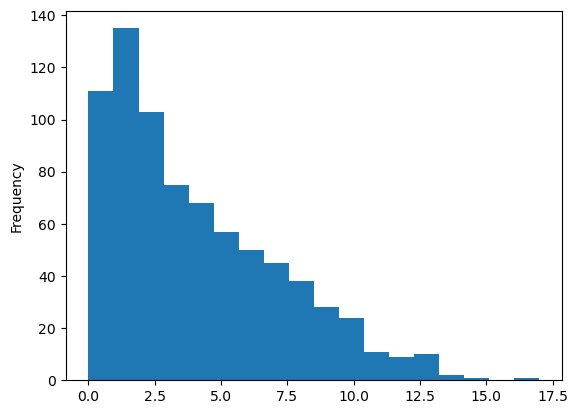

In [23]:
diabetes_by_pragnancies = diabetes_dataset[['Age', 'Outcome', 'Pregnancies']]
display(diabetes_by_pragnancies.head())
# pragnancies min, max, q1, q3, median, mean
min_pragnancies = diabetes_by_pragnancies['Pregnancies'].min()
max_pragnancies = diabetes_by_pragnancies['Pregnancies'].max()
q1_pragnancies = diabetes_by_pragnancies['Pregnancies'].quantile(q = 0.25)#, interpolation='linear')
q3_pragnancies = diabetes_by_pragnancies['Pregnancies'].quantile(q = 0.75)
mean_pragnancies = diabetes_by_pragnancies['Pregnancies'].mean()
median_pragnancies = diabetes_by_pragnancies['Pregnancies'].median()
mode_pragnancies = diabetes_by_pragnancies['Pregnancies'].mode()[0]
print(f"""Wartości istotne w analizie ilości ciąż:
    średnia = {mean_pragnancies}
    min = {min_pragnancies}
    max = {max_pragnancies}
    pierwszy kwartyl = {q1_pragnancies}
    mediana = {median_pragnancies}
    trzeci kwartyl = {q3_pragnancies}
    dominanta = {mode_pragnancies}
""")
print("Rozkład wartości ciąż w zestawieniu na podstawie histogramu")
diabetes_by_pragnancies['Pregnancies'].plot(kind='hist', bins = 18)

In [24]:
# define pragnancies ranges
def pragnancies_range(row):
    """
    0 - no pragnancies
    1 - one pragnancies
    2 - two pragnancies
    3 - three pragnancies
    4 to 8 - between 4 and 8 pragnancies
    9 and more - more than 8 pragnancies
    """
    if row['Pregnancies'] == 0:
        row['Pregnancies_range'] = '0'
    elif row['Pregnancies'] == 1:
        row['Pregnancies_range'] = '1'
    elif row['Pregnancies'] == 2:
        row['Pregnancies_range'] = '2'
    elif row['Pregnancies'] == 3:
        row['Pregnancies_range'] = '3'
    elif row['Pregnancies'] <= 8:
        row['Pregnancies_range'] = '4 - 8'
    else:
        row['Pregnancies_range'] = 'more than 8'
    return row

diabetes_by_pragnancies = diabetes_by_pragnancies.apply(lambda x: pragnancies_range(x), axis = 1)
diabetes_by_pragnancies.head()

,Age,Outcome,Pregnancies,Pregnancies_range
0,50.0,1.0,6.0,4 - 8
1,31.0,0.0,1.0,1
2,32.0,1.0,8.0,4 - 8
3,21.0,0.0,1.0,1
4,33.0,1.0,0.0,0


In [25]:
diabetes_by_pragnancies_range = diabetes_by_pragnancies.pivot_table(index = {'Pregnancies_range', 'Outcome'}, aggfunc = 'count')['Age'].to_frame()
diabetes_by_pragnancies_range.rename(columns = {'Age' : 'Number_of_People'}, inplace = True)
diabetes_by_pragnancies_range.reset_index(inplace = True)
print("Cukrzycy w zestawieniu dla zakresu ilości ciąż")
display(diabetes_by_pragnancies_range)

Cukrzycy w zestawieniu dla zakresu ilości ciąż


,Outcome,Pregnancies_range,Number_of_People
0,0.0,0,73
1,0.0,1,106
2,0.0,2,84
3,0.0,3,48
4,0.0,4 - 8,151
5,0.0,more than 8,38
6,1.0,0,38
7,1.0,1,29
8,1.0,2,19
9,1.0,3,27


In [26]:
not_diabetes_by_pragnancies = diabetes_by_pragnancies_range[diabetes_by_pragnancies_range['Outcome'] == 0.0]
is_diabetes_by_pragnancies = diabetes_by_pragnancies_range[diabetes_by_pragnancies_range['Outcome'] == 1.0]
display(not_diabetes_by_pragnancies.head())
display(is_diabetes_by_pragnancies.head())

,Outcome,Pregnancies_range,Number_of_People
0,0.0,0,73
1,0.0,1,106
2,0.0,2,84
3,0.0,3,48
4,0.0,4 - 8,151


,Outcome,Pregnancies_range,Number_of_People
6,1.0,0,38
7,1.0,1,29
8,1.0,2,19
9,1.0,3,27
10,1.0,4 - 8,107


In [27]:
by_pragnancies = not_diabetes_by_pragnancies.merge(is_diabetes_by_pragnancies, how = 'outer', on = 'Pregnancies_range')
by_pragnancies.rename(columns = {'Number_of_People_x' : 'not_diabetes', 'Number_of_People_y' : 'is_diabetes'}, inplace = True)
by_pragnancies.drop(columns = {'Outcome_x', 'Outcome_y'}, inplace = True)
display(by_pragnancies)

,Pregnancies_range,not_diabetes,is_diabetes
0,0,73,38
1,1,106,29
2,2,84,19
3,3,48,27
4,4 - 8,151,107
5,more than 8,38,48


In [28]:
by_pragnancies = by_pragnancies.apply(lambda x: percentage_of_diabetes(x), axis = 1)
by_pragnancies

,Pregnancies_range,not_diabetes,is_diabetes,percent_of_diabetes
0,0,73,38,0.342342
1,1,106,29,0.214815
2,2,84,19,0.184466
3,3,48,27,0.360000
4,4 - 8,151,107,0.414729
5,more than 8,38,48,0.558140


In [29]:
# plot
domain = by_pragnancies['Pregnancies_range']
fig = go.Figure()
fig.add_trace(go.Bar(x = domain, y = by_pragnancies['percent_of_diabetes']))
fig.update_layout(title = 'Procent osób cierpiących na cukrzycę w ujęciu zakresu ciąż')
iplot(fig)

## Analiza z uwagi na ilość ciąż
Pokazane powyżej zestawienie określa, że wraz ze wzrotem ilości ciąż więcej osób choruje na cukrzycę. Dla małej ilości ciąż 1-2 jest to niewielka wartość w stosunku do pozostałych. Trudno określić wartość przy zerowej ilości ciąż, ponieważ w zestawieniu nie ujęto płci pacjenta, a co za tym idzie nie można określić, że brak ciąży wiąże się z większym ryzykiem zachorowania na cukrzycę, poniważ zestawienie może uwzględniać mężczyzn, którzy z oczywistych względów w ciąży być nie mogą. Można jednak określić ogólną tendencję wzrostową wraz z ilością ciąż. Może to wynikać z pojawiającej się w ciąży "cukrzycy ciążowej", która później może przerodzić sie w cukrzycę typu II. Temat trzeba było by zbadać o dodatkowy parametr związany z występowaniem w trakcie ciąży cukrzycy ciążowej oraz czy konieta w ciąży dbała o zdrowy styl odżywiania, czy był to okres "odpuszczenia sobie". Na podstawie powyższych trudniej jest jednoznacznie określić czy sama ciąża wpływa na zwiększone ryzyko cukrzycy czy tylko daje "usprawiedliwienie" w niedbaniu o żywienie, przez co powoduje późniejsze powikłania zdrowotne.